# 1) Loading and preprocessing the Hand landmarks dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/Supervised_ML_Course_Project/hand_landmarks_data.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,259.135620,277.542236,4.323656e-07,271.098221,257.333374,0.007132,269.350250,237.538345,0.004480,257.334503,...,231.102150,230.308350,-0.028861,235.017242,235.029312,-0.016911,237.608711,240.918411,-0.006697,two_up_inverted
25671,90.063995,256.181732,3.808555e-07,77.302231,237.829132,0.003778,78.658888,220.471680,-0.001519,89.374163,...,116.692326,210.932007,-0.043690,112.681984,215.274353,-0.029510,110.178349,221.338379,-0.015630,two_up_inverted
25672,236.724518,251.496756,5.912488e-07,254.918358,232.369956,0.001354,256.002502,209.969106,-0.001674,247.075447,...,211.933777,202.389975,-0.031740,215.493393,208.953272,-0.021970,218.057648,215.236920,-0.010803,two_up_inverted
25673,119.466957,309.842529,4.319564e-07,111.772064,291.310333,0.006174,116.895447,273.683929,0.001893,129.239788,...,157.217422,271.056702,-0.046297,154.780106,277.261139,-0.032800,150.117119,282.011047,-0.020277,two_up_inverted




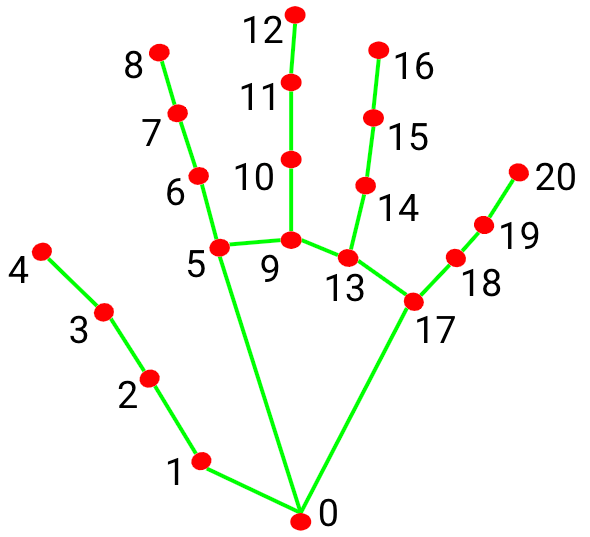

The recentering and Normalization step that was hinted in the notes
# 2) The preprocessing and data cleaning

In [7]:
# Recentering
for i in range(df.shape[0]):
    wrist_x = df.iloc[i, 0]      # column 0: x of wrist
    wrist_y = df.iloc[i, 1]      # column 1: y of wrist

    for j in range(21):  # loop over 21 landmarks
        x_col = j * 3
        y_col = j * 3 + 1

        df.iloc[i, x_col] -= wrist_x
        df.iloc[i, y_col] -= wrist_y

    # optional: explicitly set wrist to (0, 0)
    df.iloc[i, 0] = 0
    df.iloc[i, 1] = 0
# this cell takes 5 minutes to run take care or be patient😂😂, same for normalization, for loop b2a💁🏻‍♀️

In [8]:
# Normalization
for i in range(df.shape[0]):
    mid_x = df.iloc[i, 12 * 3]  # column of x for landmark 12 (middle fingertip)

    for j in range(21):
        x_col = j * 3
        y_col = j * 3 + 1

        df.iloc[i, x_col] /= abs(mid_x)  # normalize x
        df.iloc[i, y_col] /= abs(mid_x)  # normalize y

In [26]:
# Check total nulls per column
print(df.isnull().sum())

# Or: total nulls in the entire DataFrame
print("Total missing values:", df.isnull().sum().sum())

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64
Total missing values: 0


In [27]:
# checking for non numeric values if exsist
print(df.dtypes)  # should all be float or int

x1       float64
y1       float64
z1       float64
x2       float64
y2       float64
          ...   
z20      float64
x21      float64
y21      float64
z21      float64
label     object
Length: 64, dtype: object


In [28]:
# check if someting is abnormal with the labels
print(df.iloc[:, -1].value_counts())

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64


No need to drop duplicates as positions of a hand gesture could be similar

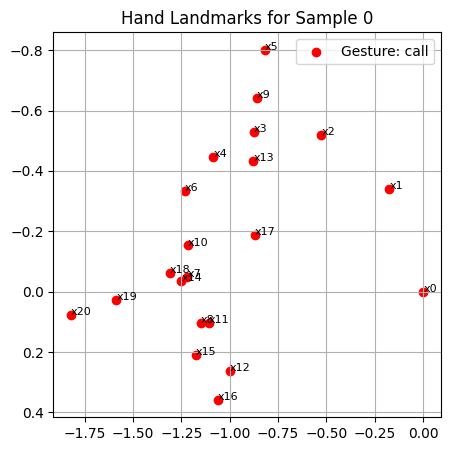

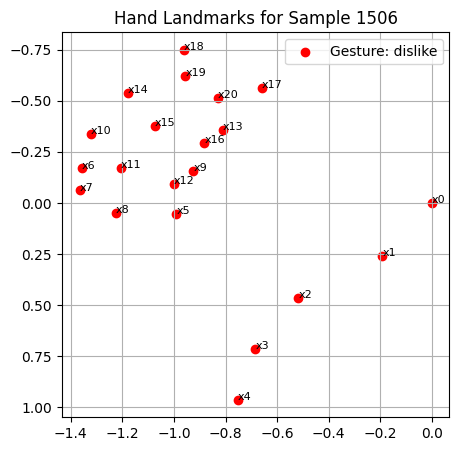

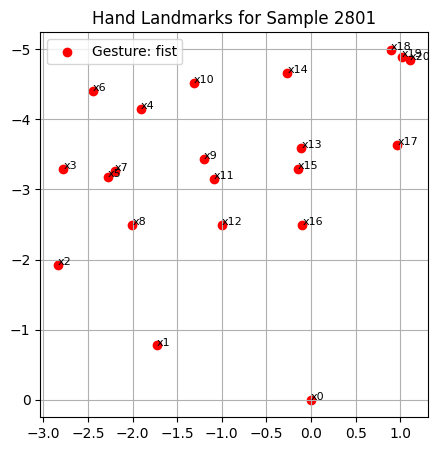

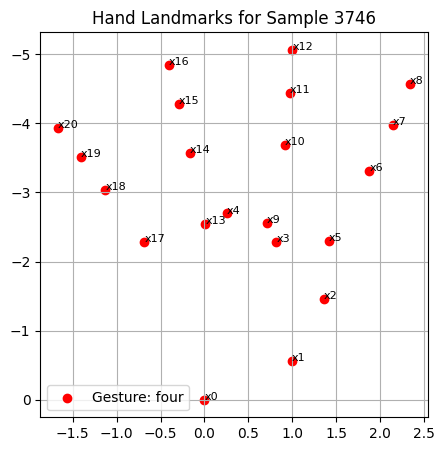

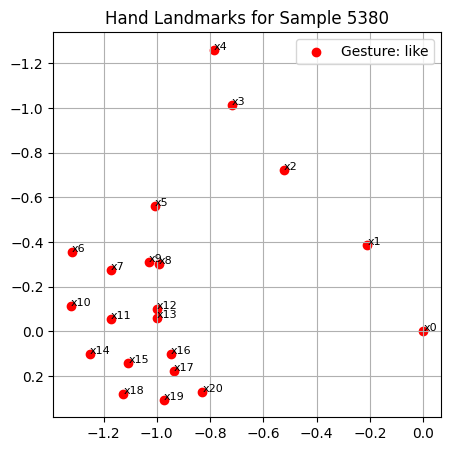

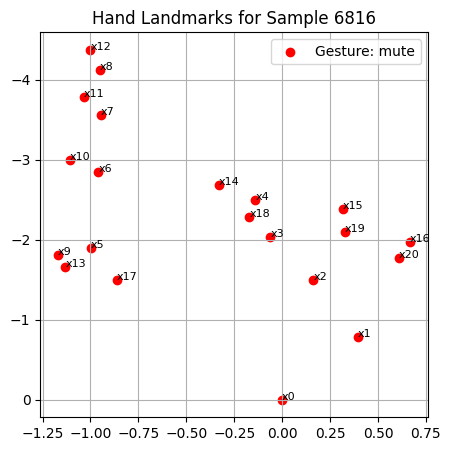

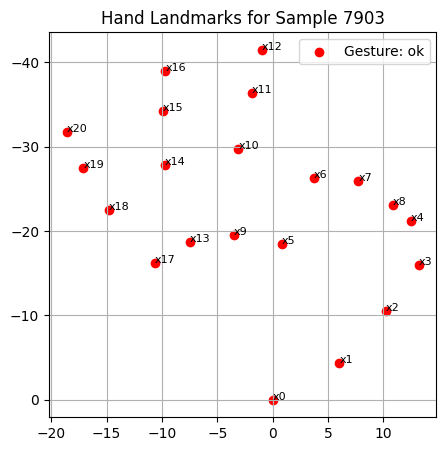

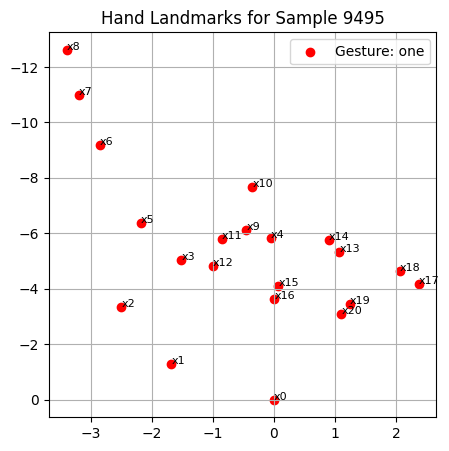

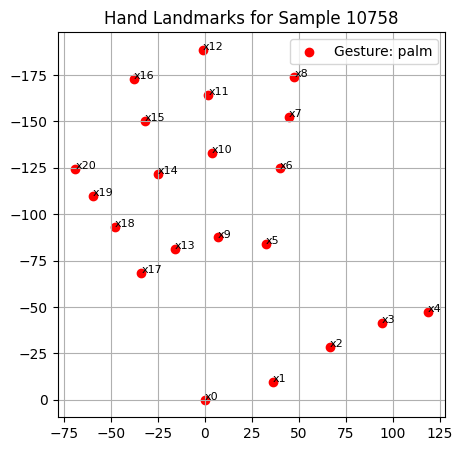

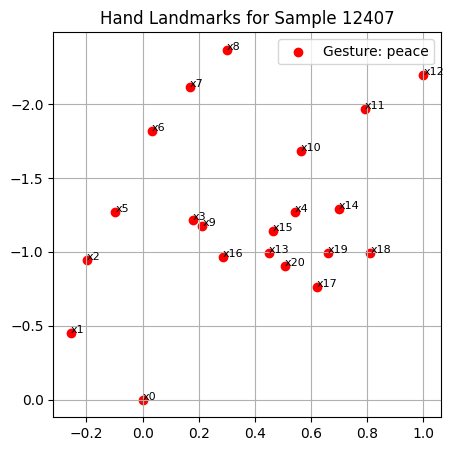

In [14]:
import matplotlib.pyplot as plt

x = df.drop('label', axis=1)  # Features: all columns except 'label'
y = df['label']

def plot_hand_landmarks(df, index, labels):
    sample = df.iloc[index]

    xs = [sample.iloc[i] for i in range(0, 63, 3)]
    ys = [sample.iloc[i] for i in range(1, 63, 3)]

    gesture_label = labels[index]

    plt.figure(figsize=(5, 5))
    plt.scatter(xs, ys, color='red', label=f'Gesture: {gesture_label}')

    for i in range(21):
        plt.text(xs[i], ys[i], f'x{i}', fontsize=8)

    plt.title(f"Hand Landmarks for Sample {index}")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()
    plt.show()

# Get unique labels
unique_labels = np.unique(y)

# Plot one sample per unique label (10)
for label in unique_labels[:10]:
    idx = np.where(y == label)[0][0]  # first index of that label
    plot_hand_landmarks(df, idx, labels=y)

# one ,dislike,four and palm plots make the most sense to my eye


# 3) Now for the training and testing part

In [15]:
from sklearn.model_selection import train_test_split

# First: train + temp test
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Then: temp split into validation + test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (17972, 63), Val: (3851, 63), Test: (3852, 63)


In [16]:
# Some feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [17]:
# First classification model (LogisticRegression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on validation set
y_pred = logreg.predict(X_val)

print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))


Logistic Regression Evaluation:
Accuracy: 0.8763957413658789
Precision: 0.8765326313754213
Recall: 0.8763957413658789
F1 Score: 0.8760355454655417


In [18]:
# Second classification model (KNN)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on validation set
y_pred = knn.predict(X_val)

print("KNN Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))


KNN Evaluation:
Accuracy: 0.7553882108543235
Precision: 0.7652505001891096
Recall: 0.7553882108543235
F1 Score: 0.7568354146305474


In [19]:
# Third classification model (Random forest)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on validation set
y_pred = rf.predict(X_val)

print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))


Random Forest Evaluation:
Accuracy: 0.9493638016099715
Precision: 0.9501793753634981
Recall: 0.9493638016099715
F1 Score: 0.9494880231294075


In [20]:
# Forth and final model (Naive bayes)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on validation set
y_pred = nb.predict(X_val)

print("Naive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))


Naive Bayes Evaluation:
Accuracy: 0.18878213451051676
Precision: 0.315897508710427
Recall: 0.18878213451051676
F1 Score: 0.14789816508183387


# 4) A plot comparison between each model

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.876396   0.876533  0.876396  0.876036
1                  KNN  0.755388   0.765251  0.755388  0.756835
2        Random Forest  0.949364   0.950179  0.949364  0.949488
3          Naive Bayes  0.188782   0.315898  0.188782  0.147898


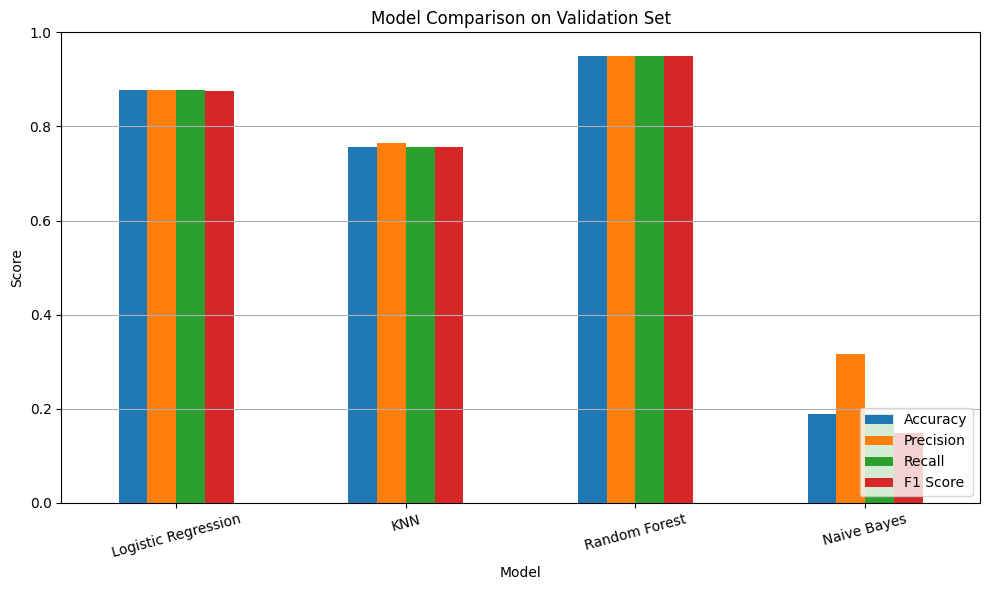

In [21]:
results = {
    "Model": ["Logistic Regression", "KNN", "Random Forest", "Naive Bayes"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

models = [logreg, knn, rf, nb]
model_names = ["Logistic Regression", "KNN", "Random Forest", "Naive Bayes"]


for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_val)  # Get predictions for the current model

    results["Accuracy"].append(accuracy_score(y_val, y_pred))
    results["Precision"].append(precision_score(y_val, y_pred, average='weighted'))
    results["Recall"].append(recall_score(y_val, y_pred, average='weighted'))
    results["F1 Score"].append(f1_score(y_val, y_pred, average='weighted'))

results_df = pd.DataFrame(results)
print(results_df)
results_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Comparison on Validation Set")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 5) Realtime video testing with mediapipe and OpenCV

I found out that Realtime video capturing is not available on Colab so i tried 2 workarounds:

Uploading a pre recorded video and analyzing it

and capturing realtime frames using javascript

In [25]:
best_model = rf

In [23]:
!pip install mediapipe

In [24]:
from google.colab import files

uploaded = files.upload()  # Choose your .mp4 video

Saving WIN_20250405_23_18_36_Pro.mp4 to WIN_20250405_23_18_36_Pro.mp4


In [44]:
import cv2
import mediapipe as mp
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

predicted_labels = []

mp_hands = mp.solutions.hands
wrist_idx = 0
mid_finger_idx = 12

# Open uploaded video
cap = cv2.VideoCapture("/content/Demo_vid_4ML.mp4")  # this video was uploaded in my notbook storage and it is upload in the project drive link provided in the google form
hands = mp_hands.Hands()

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(frame_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            data_row = []
            wrist = hand_landmarks.landmark[wrist_idx]
            mid = hand_landmarks.landmark[mid_finger_idx]
            scale = abs(mid.x)

            for lm in hand_landmarks.landmark:
                data_row.append((lm.x - wrist.x) / scale)
                data_row.append((lm.y - wrist.y) / scale)
                data_row.append(lm.z)

            data_row = np.array(data_row).reshape(1, -1)
            data_row = scaler.transform(data_row)
            prediction = best_model.predict(data_row)[0]
            label = prediction
            predicted_labels.append(label)

            print(f"🎯 Frame {frame_count}: {label}")
    else:
        print(f"🚫 Frame {frame_count}: No hand detected")

    frame_count += 1

cap.release()


🚫 Frame 0: No hand detected
🚫 Frame 1: No hand detected
🚫 Frame 2: No hand detected
🚫 Frame 3: No hand detected
🚫 Frame 4: No hand detected
🚫 Frame 5: No hand detected
🚫 Frame 6: No hand detected
🚫 Frame 7: No hand detected
🚫 Frame 8: No hand detected
🚫 Frame 9: No hand detected
🚫 Frame 10: No hand detected
🚫 Frame 11: No hand detected
🚫 Frame 12: No hand detected
🚫 Frame 13: No hand detected
🚫 Frame 14: No hand detected
🚫 Frame 15: No hand detected
🚫 Frame 16: No hand detected
🎯 Frame 17: call
🎯 Frame 18: call
🎯 Frame 19: call
🎯 Frame 20: call
🎯 Frame 21: call
🎯 Frame 22: call
🎯 Frame 23: call
🎯 Frame 24: call
🎯 Frame 25: call
🎯 Frame 26: call
🎯 Frame 27: call
🎯 Frame 28: call
🎯 Frame 29: call
🎯 Frame 30: call
🎯 Frame 31: call
🎯 Frame 32: call
🎯 Frame 33: call
🎯 Frame 34: call
🎯 Frame 35: call
🎯 Frame 36: call
🎯 Frame 37: call
🎯 Frame 38: like
🎯 Frame 39: call
🎯 Frame 40: call
🎯 Frame 41: call
🎯 Frame 42: call
🎯 Frame 43: call
🎯 Frame 44: call
🎯 Frame 45: call
🎯 Frame 46: call
🎯 Frame

In [48]:
actual_gestures = ['Call', 'peace', 'like', '4', '3', 'peace', '1', 'stop', 'stop_inv', 'palm']
unique_predictions = sorted(set(predicted_labels))
print(" predicted gestures in this video:")
print(unique_predictions)
print(" Versus actual gestures in the video:")
print(actual_gestures)

 predicted gestures in this video:
['call', 'four', 'like', 'mute', 'ok', 'peace', 'peace_inverted', 'stop', 'three', 'three2']
 Versus actual gestures in the video:
['Call', 'peace', 'like', '4', '3', 'peace', '1', 'stop', 'stop_inv', 'palm']


# Gesture Detection from an image

as frame capturing from a prerecorded video didnt perform as hoped

In [50]:
from IPython.display import Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import mediapipe as mp

# MediaPipe setup
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
wrist_idx = 0
mid_finger_idx = 12

# Fixed capture function (no double webcam trigger)
def capture_image():
    js_code = '''
        async function capture() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📷 Capture Frame';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            video.style.display = 'block';
            document.body.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            return new Promise((resolve) => {
                capture.onclick = () => {
                    const canvas = document.createElement('canvas');
                    canvas.width = video.videoWidth;
                    canvas.height = video.videoHeight;
                    canvas.getContext('2d').drawImage(video, 0, 0);
                    stream.getTracks().forEach(t => t.stop());
                    resolve(canvas.toDataURL('image/jpeg'));
                };
            });
        }
        capture();
    '''
    data = eval_js(js_code)
    binary = b64decode(data.split(',')[1])
    np_arr = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
    return img

# Capture-predict loop
while True:
    print("📸 Ready to capture a gesture! Press the button below.")
    frame = capture_image()

    hands = mp_hands.Hands(static_image_mode=True)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(frame_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            data_row = []
            wrist = hand_landmarks.landmark[wrist_idx]
            mid = hand_landmarks.landmark[mid_finger_idx]
            scale = abs(mid.x)

            for lm in hand_landmarks.landmark:
                data_row.append((lm.x - wrist.x) / scale)
                data_row.append((lm.y - wrist.y) / scale)
                data_row.append(lm.z)

            data_row = np.array(data_row).reshape(1, -1)
            data_row = scaler.transform(data_row)
            prediction = best_model.predict(data_row)[0]
            label = prediction  # ✅ Already a string, no need for le.inverse_transform()

            print("✅ Predicted Gesture:", label)
    else:
        print("🚫 No hand detected.")

    again = input("Do you want to capture another frame? (y/n): ").strip().lower()
    if again != 'y':
        print("🎉 Done with real-time predictions!")
        break
        peace nothing like dislike ok peace_inverted mute

📸 Ready to capture a gesture! Press the button below.
✅ Predicted Gesture: peace
Do you want to capture another frame? (y/n): y
📸 Ready to capture a gesture! Press the button below.
🚫 No hand detected.
Do you want to capture another frame? (y/n): y
📸 Ready to capture a gesture! Press the button below.
✅ Predicted Gesture: like
Do you want to capture another frame? (y/n): y
📸 Ready to capture a gesture! Press the button below.
✅ Predicted Gesture: dislike
Do you want to capture another frame? (y/n): y
📸 Ready to capture a gesture! Press the button below.
✅ Predicted Gesture: ok
Do you want to capture another frame? (y/n): y
📸 Ready to capture a gesture! Press the button below.
✅ Predicted Gesture: peace_inverted
Do you want to capture another frame? (y/n): y
📸 Ready to capture a gesture! Press the button below.
✅ Predicted Gesture: mute
Do you want to capture another frame? (y/n): n
🎉 Done with real-time predictions!


In [53]:
actual_gestures = ['Call', 'peace', 'nothing', 'like', 'dislike', 'ok', 'peace_inverted', 'mute']
print("predicted gestures in this video:")
print('Call', 'peace', 'no hand detected', 'like', 'dislike', 'ok', 'stop_inverted', 'mute')
print("Versus actual gestures in the video:")
print(actual_gestures)

predicted gestures in this video:
Call peace no hand detected like dislike ok stop_inverted mute
Versus actual gestures in the video:
['Call', 'peace', 'nothing', 'like', 'dislike', 'ok', 'peace_inverted', 'mute']


# **Yup more like it with gesture classification in images ✅**